# preprocessing

## libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import copy

## dataset

Attribute Information:

- 01 date : Date in MM-DD-YYYY
- 02 day : Day of the Week
- 03 quarter : A portion of the month. A month was divided into four quarters
- 04 department : Associated department with the instance
- 05 team_no : Associated team number with the instance
- 06 no_of_workers : Number of workers in each team
- 07 no_of_style_change : Number of changes in the style of a particular product
- 08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
- 09 smv : Standard Minute Value, it is the allocated time for a task
- 10 wip : Work in progress. Includes the number of unfinished items for products
- 11 over_time : Represents the amount of overtime by each team in minutes
- 12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- 13 idle_time : The amount of time when the production was interrupted due to several reasons
- 14 idle_men : The number of workers who were idle due to production interruption
- 15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [3]:
df=pd.read_csv('garments_worker_productivity.csv')

In [3]:
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

wip has a lot of NaNs, we should check it

In [5]:
df.describe(percentiles=[.1,.25,.75,.9])

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
10%       2.000000               0.600000     3.900000    532.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
90%      11.000000               0.800000    29.400000   1484.000000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
10%      960.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
90%    10170.000000    63.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
10%              0.000000       8.000000             0.470973  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
90%              1.000000      58.000000             0.939306  
max              2.000000      89.000000             1.120437

incentive has right-skewed distribution

idle_time, idle_men, no_of_style_change have a lot of zeros

In [6]:
df.team.value_counts().reset_index().sort_values(by='index')

index  team
2       1   105
1       2   109
8       3    95
3       4   105
10      5    93
9       6    94
7       7    96
0       8   109
4       9   104
5      10   100
11     11    88
6      12    99

all teams have almost even number of rows

## new columns

Attribute Information:

- 01 date : Date in MM-DD-YYYY
- 02 day : Day of the Week
- 03 quarter : A portion of the month. A month was divided into four quarters
- 04 department : Associated department with the instance
- 05 team_no : Associated team number with the instance
- 06 no_of_workers : Number of workers in each team
- 07 no_of_style_change : Number of changes in the style of a particular product
- 08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
- 09 smv : Standard Minute Value, it is the allocated time for a task
- 10 wip : Work in progress. Includes the number of unfinished items for products
- 11 over_time : Represents the amount of overtime by each team in minutes
- 12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- 13 idle_time : The amount of time when the production was interrupted due to several reasons
- 14 idle_men : The number of workers who were idle due to production interruption
- 15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [4]:
df.date = df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
df['percent_productivity']=df.actual_productivity/df.targeted_productivity
df['wip_per_worker'] = df.wip/df.no_of_workers
df['overtime_per_worker'] = df.over_time/df.no_of_workers
df['idle_percent'] = df.idle_men/df.no_of_workers

In [5]:
categorical = ['day', 'quarter', 'department', 'team']
numerical = df.columns.drop(categorical+['date']).tolist()
target = ['actual_productivity', 'percent_productivity']

## NaNs

we should analyze why wip is half full of NaNs

In [10]:
df.head(10)

date   quarter  department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2 2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1      sweing  Thursday     6                   0.80   
5 2015-01-01  Quarter1      sweing  Thursday     7                   0.80   
6 2015-01-01  Quarter1  finishing   Thursday     2                   0.75   
7 2015-01-01  Quarter1      sweing  Thursday     3                   0.75   
8 2015-01-01  Quarter1      sweing  Thursday     2                   0.75   
9 2015-01-01  Quarter1      sweing  Thursday     1                   0.75   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   
5  25.90   984.0       6720         38        0.0         0   
6   3.94     NaN        960          0        0.0         0   
7  28.08   795.0       6900         45        0.0         0   
8  19.87   733.0       6000         34        0.0         0   
9  28.08   681.0       6900         45        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  \
0                   0           59.0             0.940725   
1                   0            8.0             0.886500   
2                   0           30.5             0.800570   
3                   0           30.5             0.800570   
4                   0           56.0             0.800382   
5                   0           56.0             0.800125   
6                   0            8.0             0.755167   
7                   0           57.5             0.753683   
8                   0           55.0             0.753098   
9                   0           57.5             0.750428   

   percent_productivity  wip_per_worker  overtime_per_worker  idle_percent  
0              1.175907       18.779661           120.000000           0.0  
1              1.182000             NaN           120.000000           0.0  
2              1.000713       31.737705           120.000000           0.0  
3              1.000713       31.737705           120.000000           0.0  
4              1.000477       20.892857            34.285714           0.0  
5              1.000156       17.571429           120.000000           0.0  
6              1.006889             NaN           120.000000           0.0  
7              1.004911       13.826087           120.000000           0.0  
8              1.004130       13.327273           109.090909           0.0  
9              1.000570       11.843478           120.000000           0.0

In [11]:
df.query('team==1 and department=="finishing"')

date   quarter department        day  team  targeted_productivity  \
603  2015-02-04  Quarter1  finishing  Wednesday     1                   0.80   
626  2015-02-05  Quarter1  finishing   Thursday     1                   0.80   
642  2015-02-07  Quarter1  finishing   Saturday     1                   0.80   
660  2015-02-08  Quarter2  finishing     Sunday     1                   0.80   
675  2015-02-09  Quarter2  finishing     Monday     1                   0.80   
698  2015-02-10  Quarter2  finishing    Tuesday     1                   0.80   
725  2015-02-11  Quarter2  finishing  Wednesday     1                   0.80   
738  2015-02-12  Quarter2  finishing   Thursday     1                   0.80   
755  2015-02-14  Quarter2  finishing   Saturday     1                   0.80   
766  2015-02-15  Quarter3  finishing     Sunday     1                   0.80   
873  2015-02-22  Quarter4  finishing     Sunday     1                   0.80   
948  2015-02-26  Quarter4  finishing   Thursday     1                   0.50   
969  2015-02-28  Quarter4  finishing   Saturday     1                   0.50   
1002 2015-03-01  Quarter1  finishing     Sunday     1                   0.60   
1023 2015-03-02  Quarter1  finishing     Monday     1                   0.65   
1041 2015-03-03  Quarter1  finishing    Tuesday     1                   0.70   
1051 2015-03-04  Quarter1  finishing  Wednesday     1                   0.70   
1072 2015-03-05  Quarter1  finishing   Thursday     1                   0.70   
1098 2015-03-07  Quarter1  finishing   Saturday     1                   0.70   
1109 2015-03-08  Quarter2  finishing     Sunday     1                   0.75   
1139 2015-03-09  Quarter2  finishing     Monday     1                   0.75   
1155 2015-03-10  Quarter2  finishing    Tuesday     1                   0.75   
1177 2015-03-11  Quarter2  finishing  Wednesday     1                   0.75   

       smv  wip  over_time  incentive  idle_time  idle_men  \
603   3.94  NaN       1200          0        0.0         0   
626   3.94  NaN       1440          0        0.0         0   
642   3.94  NaN       1200          0        0.0         0   
660   3.94  NaN       1200          0        0.0         0   
675   3.94  NaN       1200          0        0.0         0   
698   3.94  NaN       1440          0        0.0         0   
725   3.94  NaN       1440          0        0.0         0   
738   3.94  NaN       1440          0        0.0         0   
755   3.94  NaN       1440          0        0.0         0   
766   3.94  NaN        960          0        0.0         0   
873   3.94  NaN       2880          0        0.0         0   
948   3.94  NaN       3360          0        0.0         0   
969   3.94  NaN       3360          0        0.0         0   
1002  3.94  NaN       3360          0        0.0         0   
1023  3.94  NaN       3360          0        0.0         0   
1041  3.94  NaN       3360          0        0.0         0   
1051  3.94  NaN        960          0        0.0         0   
1072  3.94  NaN        960          0        0.0         0   
1098  3.94  NaN        960          0        0.0         0   
1109  3.94  NaN        960          0        0.0         0   
1139  3.94  NaN          0        960        0.0         0   
1155  3.94  NaN        960          0        0.0         0   
1177  3.94  NaN       1920          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  \
603                    0           10.0             0.929183   
626                    0           12.0             0.845458   
642                    0           10.0             0.870083   
660                    0           10.0             0.893067   
675                    0           10.0             0.962017   
698                    0           12.0             0.853667   
725                    0           12.0             0.618361   
738                    0           12.0             0.664875   
755                    0 

In [12]:
df.query('wip.isnull()').department.value_counts()

finishing     257
finishing     249
Name: department, dtype: int64

In [13]:
df.query('wip.isnull()').department.value_counts().index

Index(['finishing ', 'finishing'], dtype='object')

In [14]:
df.query('department=="finishing"').wip.value_counts()

Series([], Name: wip, dtype: int64)

it turns out that we can fill these missing values with zeros because it doesn't mean any loss of information - it just tells that specific department never has "work in progress"

In [6]:
df.fillna(0,inplace=True)

we could also have noticed that name of the finishing department has a mistake in some of the rows so we should correct it and see if any other categorical feature has the same problem or has some unusual outliers

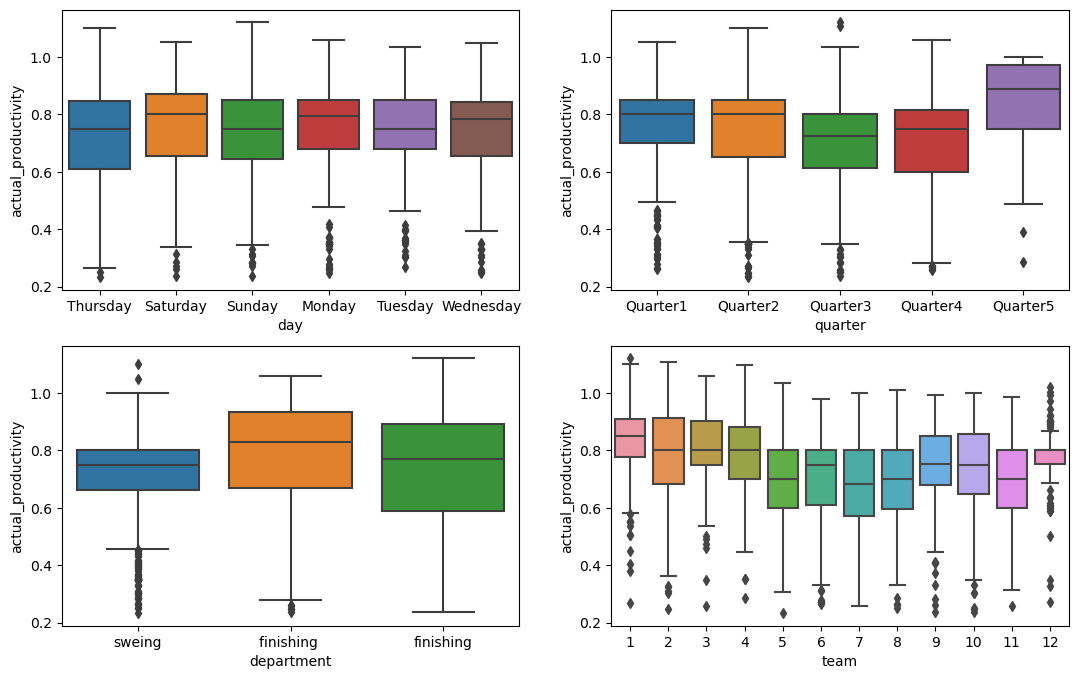

In [16]:
fig, ax = plt.subplots(2,2,figsize=(13, 8))
# , sharex=True, sharey=True - doesnt work with sns

for i in range(len(categorical)):
    sns.boxplot(data=df, x=categorical[i], y='actual_productivity', ax=ax[int(i/2),i%2])
plt.show()

nope, only finishing department:

In [7]:
df.loc[df['department']!='sweing','department']='finishing'

we also can see that variable of day of the week doesn't give much information for our target but we won't drop it yet

## outliers

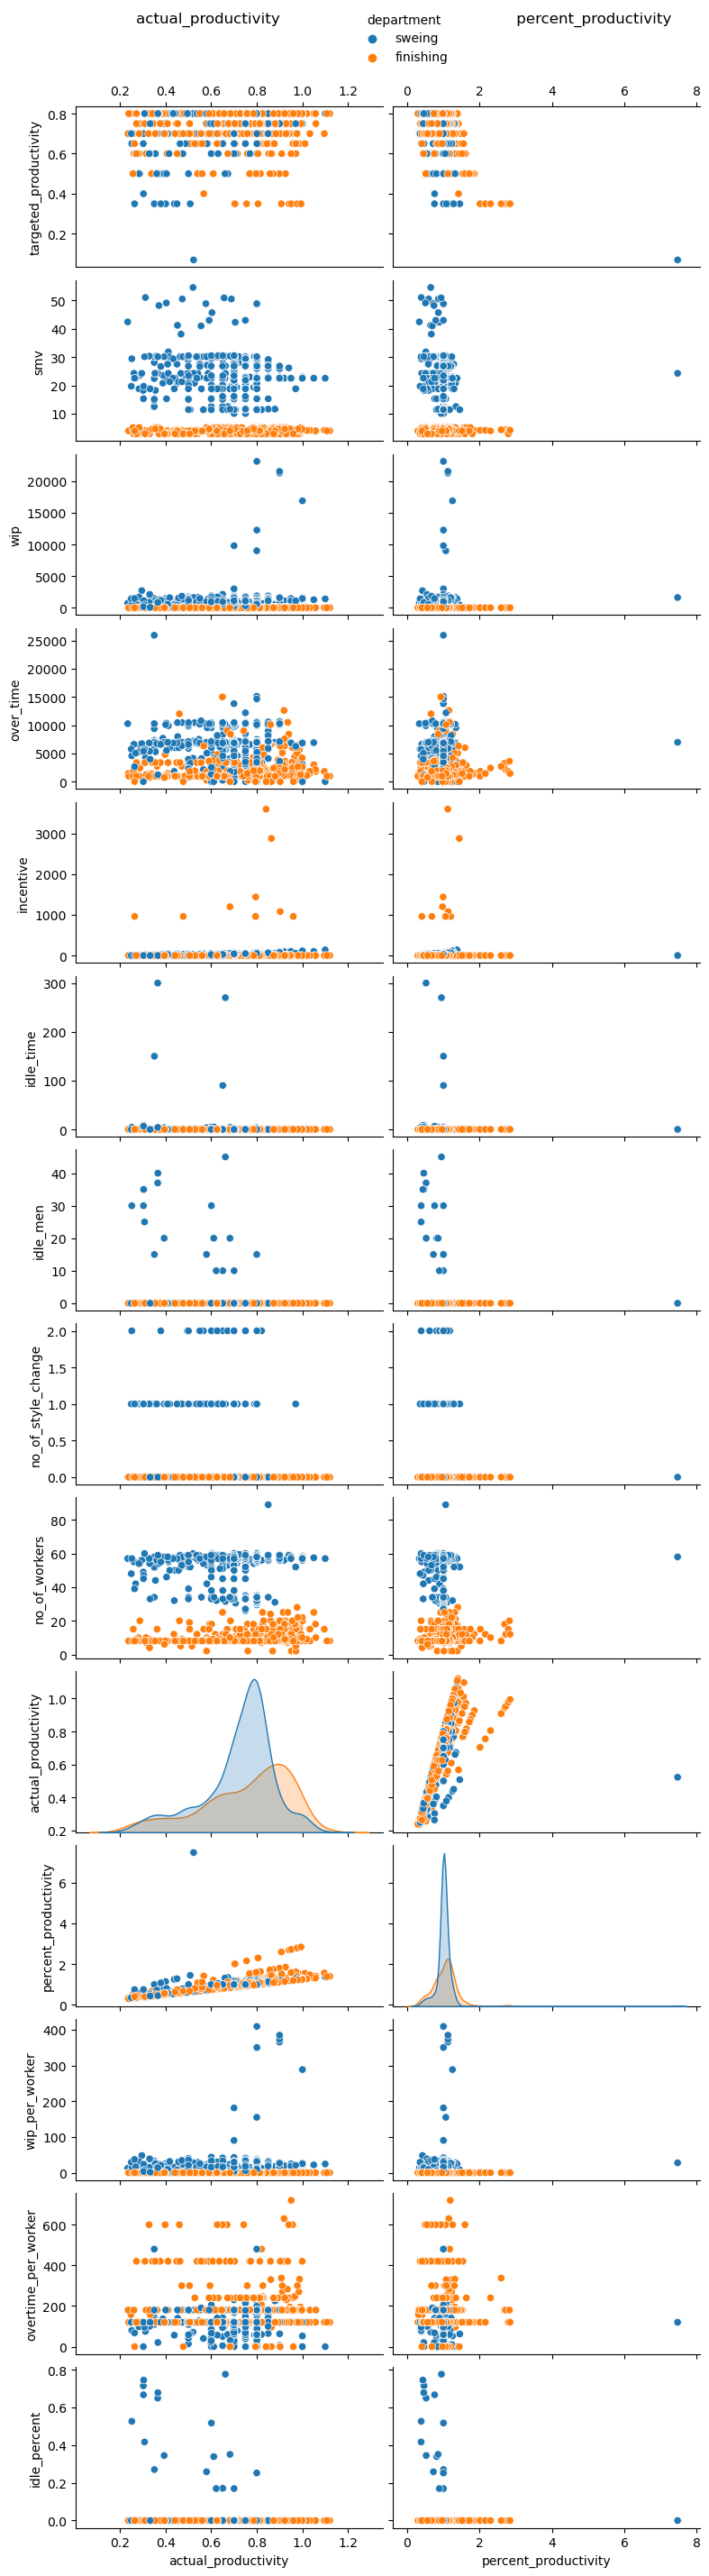

In [8]:
ax = sns.pairplot(pd.concat([df[numerical],df['department']],axis=1), x_vars=target, y_vars=numerical, hue='department', height=2, aspect=2)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1))

for ax_0 in ax.axes[0]:
    ax_0.xaxis.set_ticks_position("top")
    ax_0.spines['top'].set_visible(True)

ax.fig.suptitle("actual_productivity"+" "*50+"percent_productivity", y=1.025)
plt.show()

percent_productivity has one significantly far standing outlier, we should remove this row

In [9]:
df.drop(df.percent_productivity.argmax(),inplace=True)
df.reset_index(drop=True)

date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2    2015-01-01  Quarter1     sweing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sweing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sweing   Thursday     6                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1191 2015-03-11  Quarter2  finishing  Wednesday    10                   0.75   
1192 2015-03-11  Quarter2  finishing  Wednesday     8                   0.70   
1193 2015-03-11  Quarter2  finishing  Wednesday     7                   0.65   
1194 2015-03-11  Quarter2  finishing  Wednesday     9                   0.75   
1195 2015-03-11  Quarter2  finishing  Wednesday     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     0.0        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1191   2.90     0.0        960          0        0.0         0   
1192   3.90     0.0        960          0        0.0         0   
1193   3.90     0.0        960          0        0.0         0   
1194   2.90     0.0       1800          0        0.0         0   
1195   2.90     0.0        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  \
0                      0           59.0             0.940725   
1                      0            8.0             0.886500   
2                      0           30.5             0.800570   
3                      0           30.5             0.800570   
4                      0           56.0             0.800382   
...                  ...            ...                  ...   
1191                   0            8.0             0.628333   
1192                   0            8.0             0.625625   
1193                   0            8.0             0.625625   
1194                   0           15.0             0.505889   
1195                   0            6.0             0.394722   

      percent_productivity  wip_per_worker  overtime_per_worker  idle_percent  
0                 1.175907       18.779661           120.000000           0.0  
1                 1.182000        0.000000           120.000000           0.0  
2                 1.000713       31.737705           120.000000           0.0  
3                 1.000713       31.737705           120.000000           0.0  
4                 1.000477       20.892857            34.285714           0.0  
...                    ...             ...                  ...           ...  
1191              0.837778        0.000000           120.000000           0.0  
1192              0.893750        0.000000           120.000000           0.0  
1193              0.962500        0.000000           120.000000           0.0  
1194              0.674519        0.000000           120.000000           0.0  
1195              0.563889        0.000000           120.000000           0.0  

[1196 rows x 19 columns]

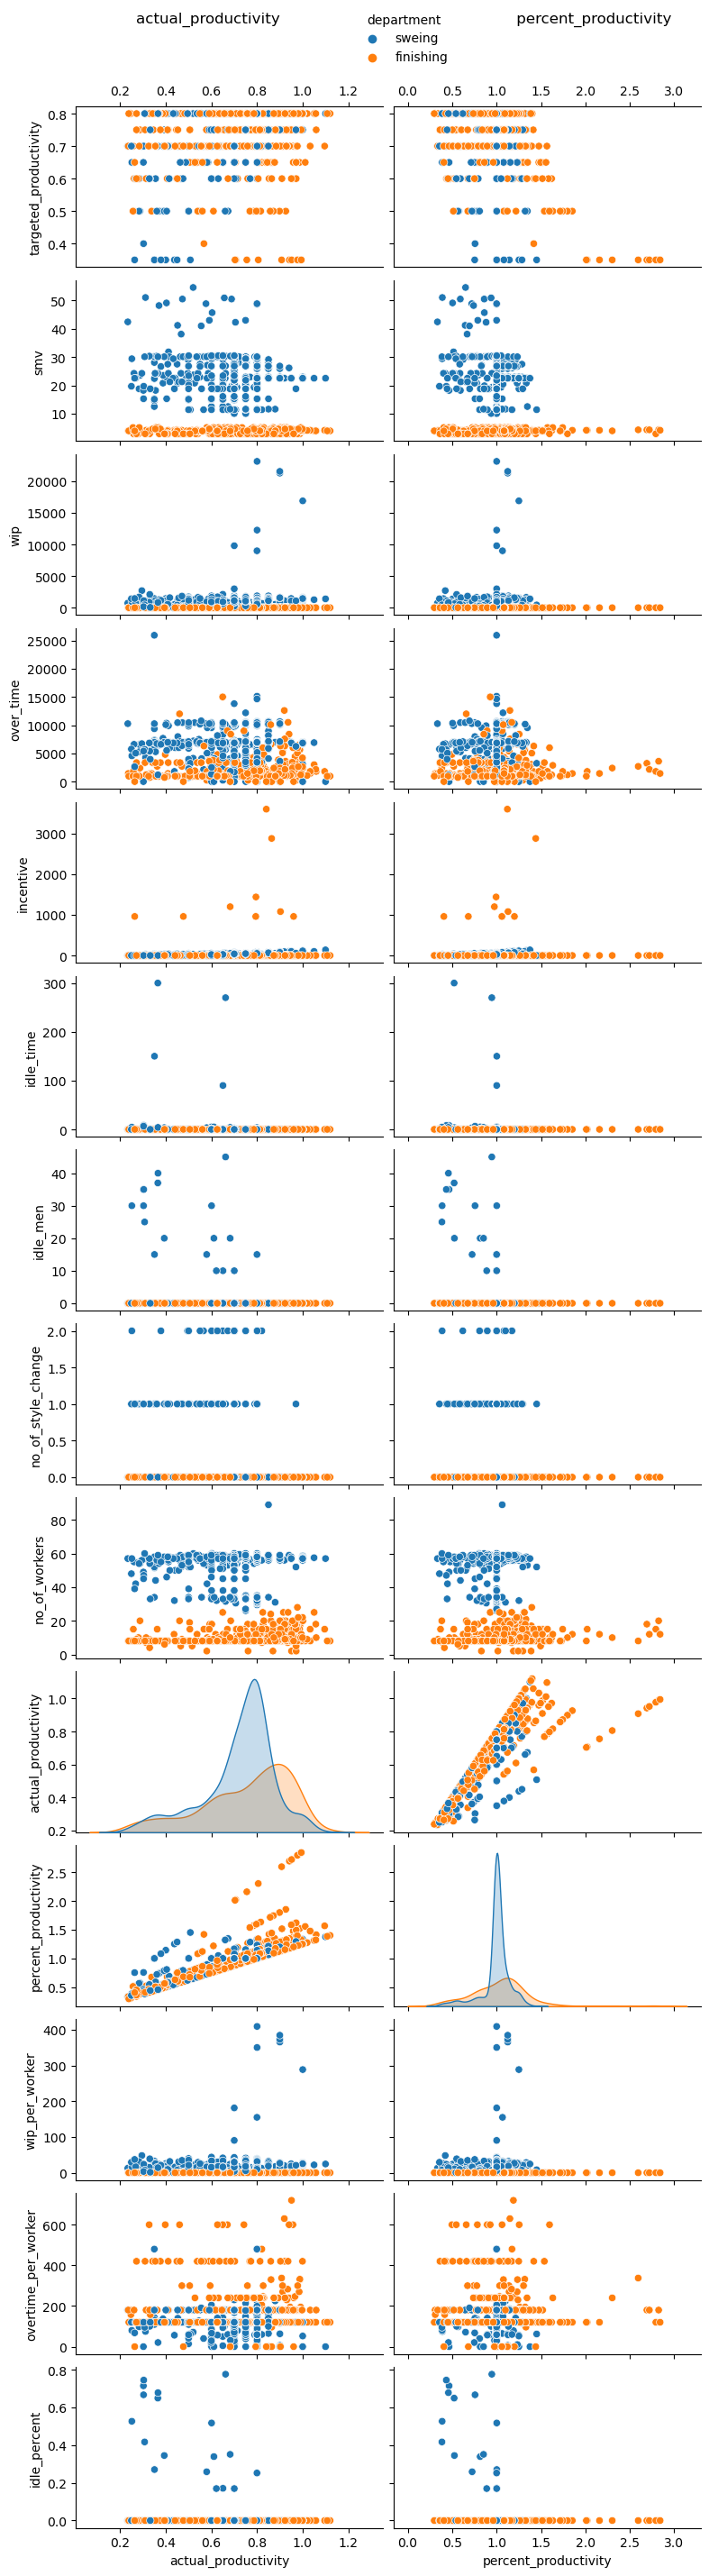

In [10]:
ax = sns.pairplot(pd.concat([df[numerical],df['department']],axis=1), x_vars=target, y_vars=numerical, hue='department', height=2, aspect=2)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1))

for ax_0 in ax.axes[0]:
    ax_0.xaxis.set_ticks_position("top")
    ax_0.spines['top'].set_visible(True)

ax.fig.suptitle("actual_productivity"+" "*50+"percent_productivity", y=1.025)
plt.show()

actual_productivity has more normally distributed data, although finishing department is left-skewed

some features also have great outliers. because there is not only one or two of outliers, we need to use winsorizing. let's take out 2.5% from the bottom and from the top of distribution, so we'll only lose 5% of information (because supposedly they belong to the same rows).

these features are:
- wip; 
- wip_per_worker over_time; 
- overtime_per_worker;
- incentive 

secondly, let's get rid of features idle_men, idle_percent and idle_time, because they have almost only zeros:

In [11]:
df.quantile(.975)

team                        12.000000
targeted_productivity        0.800000
smv                         30.330000
wip                       1635.125000
over_time                10620.000000
incentive                  113.000000
idle_time                    0.000000
idle_men                     0.000000
no_of_style_change           2.000000
no_of_workers               59.000000
actual_productivity          1.000230
percent_productivity         1.478860
wip_per_worker              35.383547
overtime_per_worker        420.000000
idle_percent                 0.000000
Name: 0.975, dtype: float64

In [12]:
new_numerical=list(set(numerical)-set(['idle_men','idle_percent','idle_time']))

In [13]:
q_top=df.quantile(.975)
q_bot=df.quantile(.025)
cycle=['wip_per_worker','overtime_per_worker','incentive']

In [14]:
string=''
for col in cycle:
    string+=' and '+str(q_bot[col])+'<='+str(col)+'<='+str(q_top[col])
string=string[5:]
wo_quant=df.query(string)

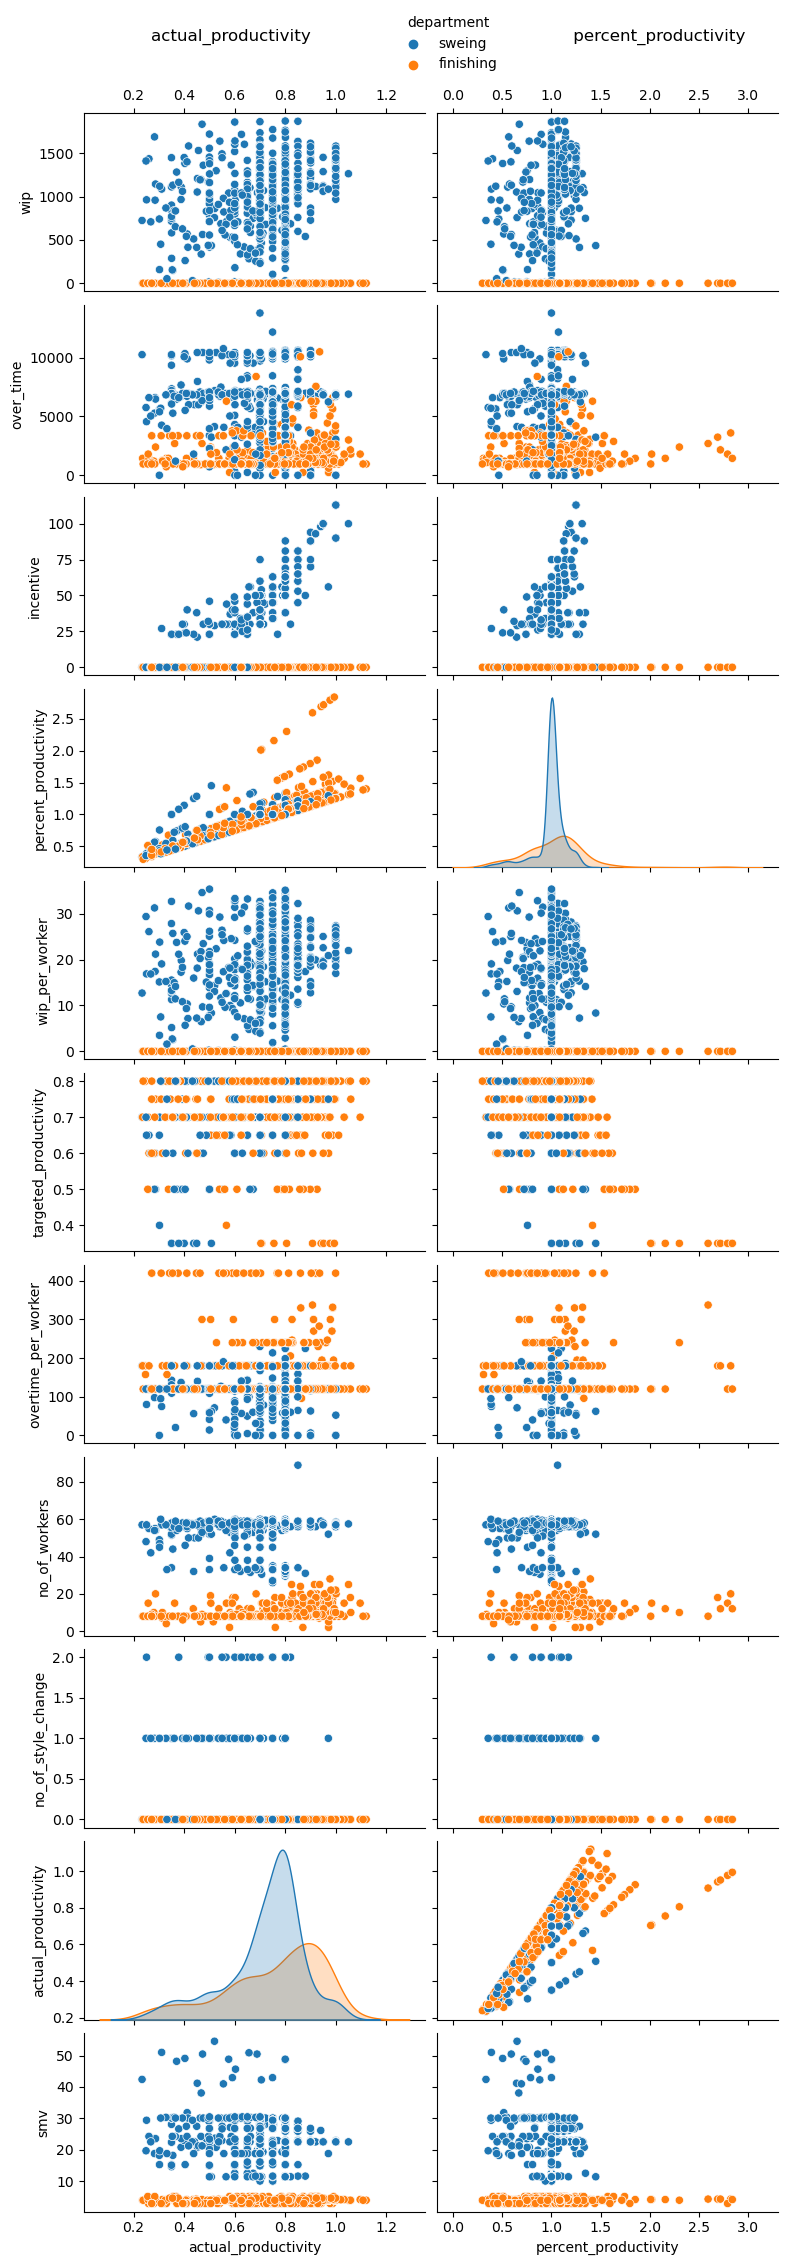

In [15]:
ax = sns.pairplot(pd.concat([wo_quant[new_numerical], wo_quant['department']],axis=1), x_vars=target, y_vars=new_numerical, hue='department', height=2, aspect=2)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1))

for ax_0 in ax.axes[0]:
    ax_0.xaxis.set_ticks_position("top")
    ax_0.spines['top'].set_visible(True)

ax.fig.suptitle("actual_productivity"+" "*50+"percent_productivity", y=1.025)
plt.show()

now we can see that wip, over_time and smv have no influence on target

no_of_workers probably too

to look closer at any variable we can use plotly:

In [19]:
# colors
from itertools import cycle
palette = cycle(['rgb(178,102,255)','rgb(255,178,102)'])

fig=go.Figure()


for col in new_numerical:

    for c,g in wo_quant.groupby("department"):

        fig.add_trace(go.Scatter(
                x = g[col],
                y = g['actual_productivity'],
                xaxis = 'x',
                yaxis = 'y',
                mode='markers',
                marker_color=next(palette), 
                marker_size = 3,
                name = col
            )).update_traces(visible=False)

        fig.add_trace(go.Histogram(
                y = g['actual_productivity'],
                xaxis = 'x2', 
                name = col,
                histnorm = 'probability',
                marker_color=next(palette),
                opacity=0.6,
                nbinsy=20
            )).update_traces(visible=False)
    
        fig.add_trace(go.Histogram(
                x = g[col],
                yaxis = 'y2', 
                name = col,
                histnorm = 'probability',
                marker_color=next(palette),
                opacity=0.6,
                nbinsx=20
            )).update_traces(visible=False)

    fig.update_layout(
        autosize = False,
        xaxis = dict(
            zeroline = False,
            domain = [0,0.85],
            showgrid = False
        ),
        yaxis = dict(
            zeroline = False,
            domain = [0,0.85],
            showgrid = False
        ),
        xaxis2 = dict(
            zeroline = False,
            domain = [0.85,1],
            showgrid = False
        ),
        yaxis2 = dict(
            zeroline = False,
            domain = [0.85,1],
            showgrid = False
        ),
        height = 600,
        width = 600,
        bargap = 0,
        barmode = 'overlay',
        title = {'text': "Numerical variables",
         'y':0.9,
         'x':0.5},
        hovermode = 'closest',
        showlegend = False,
        updatemenus=[
                {
                    "buttons": 
                    [
                        {
                            "label": k,
                            "method": "update",
                            "args": 
                            [
                                {"visible": [t.name==k for t in fig.data]},
                            ],
                        }
                        for k in new_numerical
                    ]
                }
            ]
    ).update_traces(visible=True, selector=lambda t: t.name==new_numerical[0] )

    
fig.show()